In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
## Tabular Data
data_dir = "/home/nikhil/projects/brain_changes/data/ukbb/"

tab_csv = f"{data_dir}tabular/ukb46307.csv"

tab_follow_up_csv = f"{data_dir}tabular/tab_follow_up.csv"

follow_up_subjects = f"{data_dir}ukbb_follow_up_subjects.txt"

## Select few columns (cannot read entire CSV in memory)

In [3]:
read_neurohub_manifest = False
save_ukbb_followup_subset = False

if read_neurohub_manifest:
    column_codes = {
        "eid":"eid", 
        "31-0.0":"sex",
        "34-0.0":"birth_year",
        "21022-0.0": "age_at_recruitment",
        "21003-2.0": "age_at_ses2",
        "21003-3.0": "age_at_ses3",
        "21000-0.0":"ethnicity", 
        "20252-2.0":"T1-ses2",
        "20252-3.0":"T1-ses3"}

    ukbb_tab_df = pd.read_csv(tab_csv, index_col=["eid"], usecols=column_codes.keys())

    ukbb_tab_df = ukbb_tab_df.rename(columns=column_codes)

    ## Cross-ref with currently available subjects from Neurohub
    follow_up_subjects_list = list(np.hstack(pd.read_csv(follow_up_subjects,header=None).values))

    # Make sure subjects have imaging data from ses2 and ses3
    ukbb_tab_df = ukbb_tab_df[(~ukbb_tab_df["T1-ses2"].isna()) & (~ukbb_tab_df["T1-ses3"].isna())]

    ukbb_tab_followup_df = ukbb_tab_df[ukbb_tab_df.index.isin(follow_up_subjects_list)]

    ## Save ukbb follow-up data csv to save time reading entire tabular data csv 
    if save_ukbb_followup_subset: 
        ukbb_tab_followup_df.to_csv(tab_follow_up_csv)

else:
    ukbb_tab_followup_df = pd.read_csv(tab_follow_up_csv)



print(f'Number of available follow up subjects: {len(ukbb_tab_followup_df)}')

ukbb_tab_followup_df.head()

Number of available follow up subjects: 1502


,eid,sex,birth_year,T1-ses2,T1-ses3,ethnicity,age_at_ses2,age_at_ses3,age_at_recruitment
0,1004084,1.0,1947.0,20252_2_0,20252_3_0,1001.0,70.0,72.0,60.0
1,1010063,0.0,1964.0,20252_2_0,20252_3_0,1001.0,53.0,55.0,45.0
2,1013774,1.0,1955.0,20252_2_0,20252_3_0,1001.0,62.0,64.0,54.0
3,1014782,1.0,1947.0,20252_2_0,20252_3_0,1001.0,70.0,72.0,61.0
4,1016215,1.0,1951.0,20252_2_0,20252_3_0,1001.0,65.0,67.0,56.0


## plots

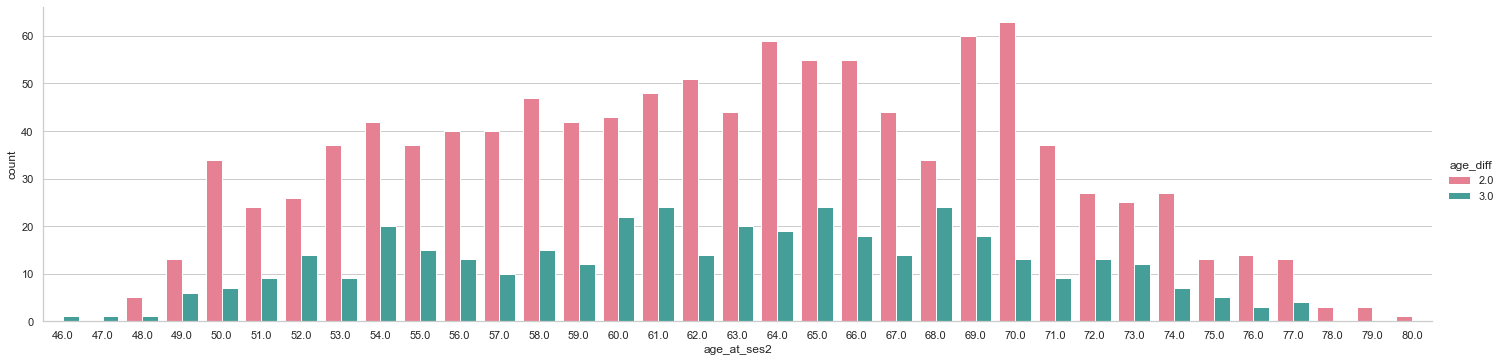

In [4]:
plot_df = ukbb_tab_followup_df.copy()
plot_df["age_diff"] = plot_df["age_at_ses3"] - plot_df["age_at_ses2"]
palette = 'husl'
sns.set(font_scale=1)
with sns.axes_style("whitegrid"):
    g = sns.catplot(x="age_at_ses2", hue="age_diff", kind='count',
    aspect=4, height=5, palette = palette, data=plot_df)
